Lambda School Data Science

*Unit 4, Sprint 1, Module 1*

---
<h1 id="moduleTitle"> Natural Language Processing Introduction (Prepare)</h1>

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently. 
    

<h2 id='moduleObjectives'>Learning Objectives</h2>

By the end of end of this module, a student should be able to:
* <a href="#p1">Objective 1</a>: Tokenize text
* <a href="#p1">Objective 2</a>: Remove stop words from text
* <a href="#p3">Objective 3</a>: Perform stemming and lemmatization on tokens

## Conda Environments

You will be completing each module this sprint on your machine. We will be using conda environments to manage the packages and their dependencies for this sprint's content. In a classroom setting, instructors typically abstract away environment for you. However, environment management is an important professional data science skill. We showed you how to manage environments using pipvirtual env during Unit 3, but in this sprint, we will introduce an environment management tool common in the data science community: 

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

The easiest way to install conda on your machine is via the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python & R. Once you have conda installed, read ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533). This article will provide an introduce into some of the conda basics. If you need some additional help getting started, the official ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) guide will point you in the right direction. 

:snake: 

To get the sprint environment setup: 

1. Open your command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
2. Navigate to the folder with this sprint's content. There should be a `requirements.txt`
3. Run `conda create -n U4-S1-NLP python==3.7` => You can also rename the environment if you would like. Once the command completes, your conda environment should be ready.
4. Now, we are going to add in the require python packages for this sprint. You will need to 'activate' the conda environment: `source activate U4-S1-NLP` on Terminal or `conda activate U4-S1-NLP` on Anaconda Prompt. Once your environment is activate, run `pip install -r requirements.txt` which will install the required packages into your environment.
5. We are going to also add an Ipython Kernel reference to your conda environment, so we can use it from JupyterLab. 
6. Next run `python -m ipykernel install --user --name U4-S1-NLP --display-name "U4-S1-NLP (Python3)"` => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python. :) 
7. Last step, we need to install the models for Spacy. Run these commands `python -m spacy download en_core_web_md` and `python -m spacy download en_core_web_lg`
8. Deactivate your conda environment and launch JupyterLab. You should know see "U4-S1-NLP (Python3)" in the list of available kernels on launch screen. 

# Tokenze Text (Learn)
<a id="p1"></a>

## Overview

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


### The attributes of good tokens

* Should be stored in an iterable data structure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

Let's pretend we are trying analyze the random sequence here. Question: what is the most common character in this sequence?

In [ ]:
# FOR COLAB ONLY -- Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

In [ ]:
!python -m spacy download en_core_web_lg  # Can do lg, takes awhile
# Also on Colab, you need to restart runtime after this step!

In [2]:
random_seq = "AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ"

A useful unit of analysis for us is going to be a letter or character

In [3]:
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


Our tokens are already "good": in an iterable datastructure, all the same case, and free of noise characters (punctuation, whitespace), so we can jump straight into analysis.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


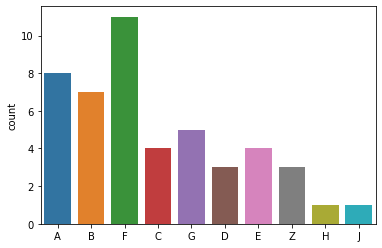

In [4]:
import seaborn as sns

sns.countplot(tokens);

The most common character in our sequence is  "F". We can't just glance at the the sequence to know which character is the most common. We (humans) struggle to subitize complex data (like random text sequences).

> __Subitize__ is the ability to tell the number of objects in a set, quickly, without counting.  

We need to chunk the data into countable pieces "tokens" for us to analyze them. This inability subitize text data is the motivation for our discussion today.

### Tokenizing with Pure Python

In [5]:
sample = "Friends, Romans, countrymen, lend me your ears;"

In [6]:
sample

'Friends, Romans, countrymen, lend me your ears;'

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to separate the whitespace and create iterable units. :)

In [8]:
sample.split(" ")

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

##### Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example: 

In [9]:
# COLAB ONLY -- download and unzip dataset 
# If you're working locally, you should already have a copy of this dataset
!wget https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=true -O datafiniti.zip
!unzip datafiniti.zip

--2020-11-30 17:37:51--  https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/raw/main/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip [following]
--2020-11-30 17:37:52--  https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/raw/main/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip [following

In [1]:
import pandas as pd
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [2]:
df.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [14]:
df["reviews.text"][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [15]:
# Notice anything odd here? 
# without case standardization, we can have unnecessary distinctions like this 
df['brand'].value_counts()

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [16]:
# Much cleaner!
df['brand'] = df['brand'].apply(lambda text: text.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

##### Keep Only Alphanumeric Characters
Yes, we only want letters and numbers. Everything else is probably noise: punctuation, whitespace, and other notation. This one is little bit more complicated than our previous example. Here we will have to import the base package `re` (regular expressions). 

The only regex expression pattern you need for this is `'[^a-zA-Z 0-9]'` which keeps lower case letters, upper case letters, spaces, and numbers.

In [17]:
sample = sample+" 911"
print(sample)

Friends, Romans, countrymen, lend me your ears; 911


In [20]:
# You can google for any number of Regex IDE
# but here is the one that I shared in lecture: https://regexr.com/
# remember that regex has its own syntax but the link I shared provides a nice cheat sheet 
# also, some tasks are so common that you could google search, for example, how to capture emails, take that solution, and tweak it for your specific needs 
import re

re.sub('[^a-zA-Za-g0-9]', ' ', sample)

'Friends  Romans  countrymen  lend me your ears  911'

#### Two Minute Challenge 
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean text before we analyze it
- You can put the methods in any order you want

In [3]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    # remove non-alphaunmeric
    text = re.sub('[^a-zA-Z 0-9]', '', text)
    # make all text lower case
    text = text.lower()
    # split into tokens using whitespaces 
    tokens = text.split(" ")
    
    return tokens

In [25]:
sample

'Friends, Romans, countrymen, lend me your ears; 911'

In [26]:
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears', '911']

## Follow Along

Our inability to analyze text data becomes quickly amplified in a business context. Consider the following: 

A business which sells widgets also collects customer reviews of those widgets. When the business first started out, they had a human read the reviews to look for patterns. Now, the business sells thousands of widgets a month. The human readers can't keep up with the pace of reviews to synthesize an accurate analysis. They need some science to help them analyze their data.

Now, let's pretend that business is Amazon, and the widgets are Amazon products such as the Alexa, Echo, or other AmazonBasics products. Let's analyze their reviews with some counts. This dataset is available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [4]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
df.shape

(28332, 24)

In [9]:
# How can we count the raw text?
df['reviews.text'].value_counts(normalize=True)[:50] * 100

good                0.211775
great               0.172949
Good                0.148242
Great               0.134124
ok                  0.116476
Great price         0.105887
great price         0.098828
Excellent           0.098828
Great value         0.095299
good price          0.081180
great value         0.077651
Great price!        0.063532
good value          0.060003
good deal           0.056473
Great value.        0.056473
Great deal          0.052944
As expected         0.052944
Good deal           0.052944
OK                  0.052944
Great product       0.052944
Good batteries      0.049414
Good value          0.049414
Great batteries.    0.045885
Great value!        0.045885
Good price          0.045885
So far so good      0.045885
great deal          0.045885
Good buy            0.042355
Work great          0.042355
Great batteries     0.038825
Great!              0.038825
very good           0.038825
Great buy           0.038825
good batteries      0.038825
as expected   

In [10]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [12]:
# side-by-side comparision between raw text and tokens 
df[['tokens', "reviews.text"]].head()

,tokens,reviews.text
0,"[i, order, 3, of, them, and, one, of, the, ite...",I order 3 of them and one of the item is bad q...
1,"[bulk, is, always, the, less, expensive, way, ...",Bulk is always the less expensive way to go fo...
2,"[well, they, are, not, duracell, but, for, the...",Well they are not Duracell but for the price i...
3,"[seem, to, work, as, well, as, name, brand, ba...",Seem to work as well as name brand batteries a...
4,"[these, batteries, are, very, long, lasting, t...",These batteries are very long lasting the pric...


In [14]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [15]:
# can mask for articels in a specific category 
# let's simply focus on articles in the electronics section for simplicity 
cate_mask = df['primaryCategories'] == 'Electronics'

df = df[cate_mask].copy()

In [16]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2017-11-12T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2014-06-14T05:00:00Z,2014-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2019-02-15T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting..."
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,AmazonBasics,YBB12400R2,2014-06-19T05:00:00Z,2014-08-28T00:00:00Z,NaN,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[my, initial, impression, of, this, was, very,..."
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",Amazon,B01E6AO69U,2018-10-15T00:00:00.000Z,"2019-04-24T00:00:00Z,2019-04-25T00:00:00Z",True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


#### Analyzing Tokens

In [18]:
df["tokens"].head()

8343    [great, case, to, keep, everything, in, its, p...
8344    [after, discarding, and, getting, rid, of, bro...
8345    [a, few, dollars, more, but, i, am, boycotting...
8346    [my, initial, impression, of, this, was, very,...
8347    [pros, standard, echo, cons, older, generation...
Name: tokens, dtype: object

In [20]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df["word_count"] = df['tokens'].apply(lambda tokens: word_counts.update(tokens))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 17723),
 ('and', 14005),
 ('it', 13113),
 ('to', 12750),
 ('for', 12224),
 ('i', 12037),
 ('a', 10494),
 ('is', 8508),
 ('this', 8109),
 ('my', 7914)]

Let's create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.

In [22]:
def count(docs):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [24]:
df['tokens'].head()

8343    [great, case, to, keep, everything, in, its, p...
8344    [after, discarding, and, getting, rid, of, bro...
8345    [a, few, dollars, more, but, i, am, boycotting...
8346    [my, initial, impression, of, this, was, very,...
8347    [pros, standard, echo, cons, older, generation...
Name: tokens, dtype: object

In [23]:
# Use the Function
wc = count(df['tokens'])

In [26]:
# this is the first apperance of stop words
# I pointed out how the most common words are useless words that eventrally get filtered out 
# notice that "the" appears 55.7% of documents and appears for a over 17K times through the entire corpus
# so useless words dominate a huge portion of the total number of tokens present
# we will want to remove these stop words 
wc.head(12)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,the,7809,17723,1.0,0.041078,0.041078,0.557985
86,and,8543,14005,2.0,0.032461,0.073539,0.610432
8,it,7490,13113,3.0,0.030393,0.103932,0.535191
10,to,7137,12750,4.0,0.029552,0.133484,0.509968
60,for,7990,12224,5.0,0.028333,0.161816,0.570918
99,i,6072,12037,6.0,0.027899,0.189716,0.433869
3,a,6292,10494,7.0,0.024323,0.214038,0.449589
20,is,5538,8508,8.0,0.019720,0.233758,0.395713
81,this,6236,8109,9.0,0.018795,0.252553,0.445588
6,my,6210,7914,10.0,0.018343,0.270896,0.443730


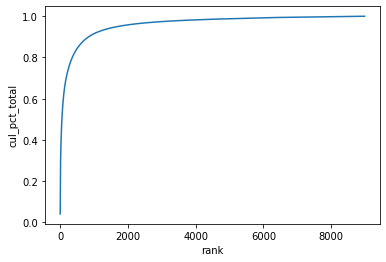

In [27]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [28]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.6126792228923197

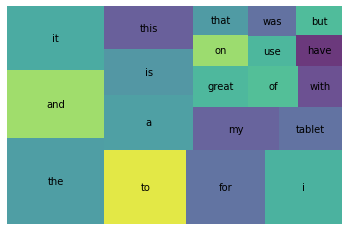

In [29]:
# this is an example of a words cloud
# you can google for more examples, often more artistic examples 

import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Processing Raw Text with Spacy

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components in various data structures, Spacy indexes components and simply stores the lookup information. 

This is often why Spacy is considered to be more production grade than library like NLTK.

In [30]:
import spacy

# treat nlp as a blackbox for today (we will talk about it tomorrow)
# what we are doing here is loading in a pre-trained neural network model with a bunch of useful functionality! 
nlp = spacy.load('en_core_web_lg')

In [31]:
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”
"""

In [33]:
# here's our toy example article 
sample


'\nNatural Language Processing Summary\nThe field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).\n\n“Nat\xadur\xadal Lan\xadguage Pro\xadcessing is a field that cov\xaders com\xadputer un\xadder\xadstand\xading and ma\xadnip\xadu\xadla\xadtion of hu\xadman lan\xadguage, and it’s ripe with pos\xadsib\xadil\xadit\xadies for news\xadgath\xader\xading,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu\xadally hear about it in the con\xadtext of ana\xadlyz\xading large pools of legis\xadla\xadtion or other doc\xadu\xadment sets, at\xadtempt\xading to dis\xadcov\xader pat\xadterns or root out cor\xadrup\xadtion.”\n'

In [41]:
# by passying in a doc/article into nlp, the doc inherits a bunch of useful functionality 
doc = nlp(sample)

In [36]:
# save lists of article tokens 
tokens = []

# iter through each doc in our dataset
for doc in nlp.pipe(df['reviews.text']):
    
    # save tokens in article
    doc_tokens = []
    
    # iter through the tokens in each doc/article
    for token in doc: 
        
        # store tokens for each article/doc
        doc_tokens.append(token.text)
    

    tokens.append(doc_tokens)

In [37]:
# number of docs in electronics category 
len(tokens)

13995

In [40]:
# raw string
df['reviews.text'].iloc[0]

'Great case to keep everything in its place! My husband love it!!!! Holds a lot of cds!'

In [38]:
# tokenized string
tokens[0]

['Great',
 'case',
 'to',
 'keep',
 'everything',
 'in',
 'its',
 'place',
 '!',
 'My',
 'husband',
 'love',
 'it',
 '!',
 '!',
 '!',
 '!',
 'Holds',
 'a',
 'lot',
 'of',
 'cds',
 '!']

In [43]:
df['tokens'] = tokens

In [44]:
df['tokens'].head()

8343    [Great, case, to, keep, everything, in, its, p...
8344    [After, discarding, and, getting, rid, of, bro...
8345    [A, few, dollars, more, ,, but, I, am, boycott...
8346    [My, initial, impression, of, this, was, very,...
8347    [Pros, :, Standard, Echo, ., Cons, :, Older, g...
Name: tokens, dtype: object

In [45]:
wc = count(df['tokens'])

In [47]:
# this is what happens if we don't filtered out non-alphanumeric tokens 
# we punctuation dominating the appears of tokens in our corpus 
# punctuation is not something that conveys any useful meaning
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
51,.,11468,30480,1.0,0.062103,0.062103,0.819436
41,the,7234,15183,2.0,0.030935,0.093038,0.516899
91,and,8454,13790,3.0,0.028097,0.121135,0.604073
9,to,7126,12732,4.0,0.025941,0.147076,0.509182
111,I,6081,12615,5.0,0.025703,0.172779,0.434512
7,it,7167,12195,6.0,0.024847,0.197626,0.512111
65,for,7863,11920,7.0,0.024287,0.221913,0.561844
56,",",4827,10466,8.0,0.021324,0.243237,0.344909
2,a,6187,10256,9.0,0.020896,0.264134,0.442086
21,is,5549,8575,10.0,0.017471,0.281605,0.396499


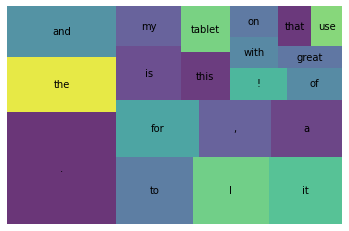

In [48]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

In the module project, you will apply tokenization to another set of review data and produce visualizations of those tokens. 

In [ ]:
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs',
 'tokens']

# Stop Words (Learn)
<a id="p2"></a>

## Overview
Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our understanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis. 

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding. 

## Follow Along 

### Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [ ]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

In [ ]:
# let's use spacy to improve upon our previous tokenizer by filtering out stop words and punctuation 

tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [ ]:
df.tokens.head()

8343    [great, case, place, husband, love, holds, lot...
8344    [discarding, getting, rid, broken, cd, cases, ...
8345                        [dollars, boycotting, amazon]
8346    [initial, impression, good, material, nicer, s...
8347    [pros, standard, echo, cons, older, generation...
Name: tokens, dtype: object

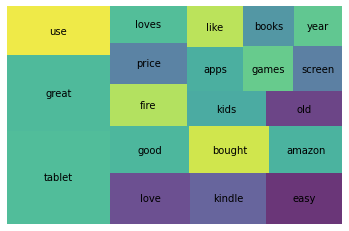

In [ ]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Extending Stop Words

In [50]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [51]:
# although spacy provides a large set of stop words, we can extend it to include stop words that are particular to our dataset 
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [ ]:
STOP_WORDS

In [53]:
# yet again -- we are creating an even more sophisticated tokenizer by adding more filters 
tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: 
      # conditional logic to filter out bad tokens
      # filtering pucnt AND filtering out stopwords from our tokens
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
          # lower tokens in order to standardize case (i.e. all lower case)
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [54]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
792,tablet,4617,5896,1.0,0.030740,0.030740,0.329904
2,great,4136,4871,2.0,0.025396,0.056137,0.295534
274,use,2758,3108,3.0,0.016204,0.072341,0.197070
0,love,2272,2530,4.0,0.013191,0.085532,0.162344
1170,kindle,1861,2378,5.0,0.012398,0.097930,0.132976


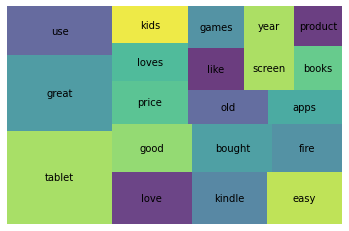

In [55]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
df['reviews.rating'].value_counts()

5    9371
4    3703
3     551
1     187
2     183
Name: reviews.rating, dtype: int64

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data. 

Do you remember this graph?

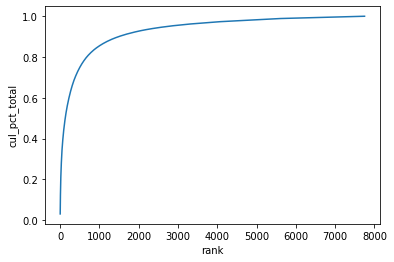

In [56]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways: 
1. The words that appear most frequently may not provide any insight into the mean on the documents since they are so prevalent. 
2. Words that appear infrequency (at the end of the graph) also probably do not add much value, because the are mentioned so rarely. 

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

In [57]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7728,open!1,1,1,7729.0,0.000005,0.999901,0.000071
7729,shades,1,1,7730.0,0.000005,0.999906,0.000071
7730,diabetic,1,1,7731.0,0.000005,0.999911,0.000071
7731,scheduling,1,1,7732.0,0.000005,0.999917,0.000071
7732,alertanative,1,1,7733.0,0.000005,0.999922,0.000071
7735,pearl,1,1,7734.0,0.000005,0.999927,0.000071
7733,rearvision,1,1,7735.0,0.000005,0.999932,0.000071
7737,fyi,1,1,7736.0,0.000005,0.999937,0.000071
7736,mounts,1,1,7737.0,0.000005,0.999943,0.000071
7738,magnetically,1,1,7738.0,0.000005,0.999948,0.000071


In [ ]:
wc['appears_in_pct'].describe()

count    7748.000000
mean        0.001632
std         0.008878
min         0.000071
25%         0.000071
50%         0.000214
75%         0.000572
max         0.329904
Name: appears_in_pct, dtype: float64

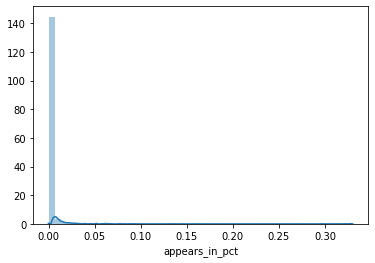

In [ ]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

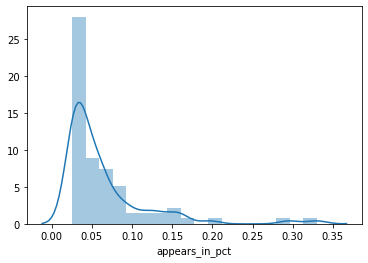

In [ ]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [ ]:
wc.shape

(80, 7)

## Challenge

In the module project, you will apply stop word removal to a new corpus. You will focus on applying dictionary based stop word removal, but as a stretch goal, you should consider applying statistical stopword trimming. 

# Stemming & Lemmatization (Learn)
<a id="p3"></a>

## Overview

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word. 

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations 
- how to do it in spacy & nltk
- introduce PoS in here as well

## Follow Along

#### Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming. 

In [59]:
# SIDE NOTE: in practice, you'll need to choose to use EITHER stemming or lematization -- but not both! 

from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["is", "was", "be", "are", "swim", "swimming","swims" , "swim"]

for word in words:
    print(ps.stem(word))

is
wa
be
are
swim
swim
swim
swam
swam


### Two Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

In [60]:
# Put in a new column `stems`
def get_stems(text):
  return [ps.stem(word) for word in text.split() if word not in STOP_WORDS]

df['stems'] = df['reviews.text'].apply(get_stems)

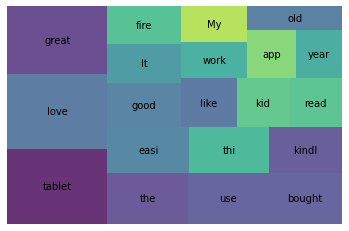

In [61]:
wc = count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrieval algorithms use stemming. Why? Because it's fast. 

Lemmatization on the other hand is more methodical. The goal is to transform a word into its base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

In [63]:
sent = "wolves, wolf"
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

wolves    wolf
,    ,
wolf    wolf


In [64]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [65]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)  # Takes a few minutes!

In [ ]:
df['lemmas'].head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, Standard, Echo, con, old, generation, Ec...
Name: lemmas, dtype: object

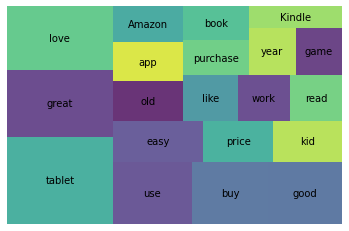

In [ ]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text. 

# Review

In this module project, you've seen us apply Natural Language Processing techniques (tokenization, stopword removal, and lemmatization) to a corpus of Amazon text reviews. We analyzed those reviews using these techniques and discovered that Amazon customers are generally satisfied with the battery life of Amazon products and generally appear satisfied. 

You will apply similar techniques to today's [module project assignment](LS_DS_411_Text_Data_Assignment.ipynb) to analyze coffee shop reviews from yelp. Remember that the techniques of processing the text are just the beginning. There are many ways to slice and dice the data. 

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf

## Advanced Resources & Techniques
- Named Entity Recognition (NER)
- Dependcy Trees 
- Generators
- the major libraries (NLTK, Spacy, Gensim)